In [3]:
import pandas as pd

In [4]:
tweet = "E:/Education/NLP/Tweets.csv"

In [5]:
tweets = pd.read_csv(tweet)

In [6]:
# Import the vectorizer and default English stop words list
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words)
#vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(tweets.text)
#vect2.fit(tweets.negativereason)

# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names()[-15:])
#print(vect2.get_feature_names())

['zoom', 'zouowgv3q6', 'zpz78poeon', 'zqutus7epw', 'zrh', 'zrh_airport', 'zsdgzydnde', 'zsuztnaijq', 'ztrdwv0n4l', 'zukes', 'zurich', 'zv2pt6trk9', 'zv6cfpohl5', 'zvfmxnuelj', 'zzps5ywve2']


Create a word cloud

In [7]:
tweetstring = tweets.text.values

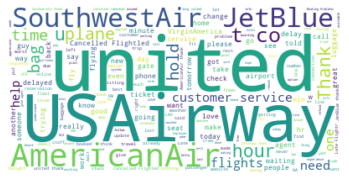

In [8]:
# Import the word cloud function 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

my_stop_words = STOPWORDS.update(['airline', 'airplane','http','flight','will','still','now','amp'])


# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white',stopwords=my_stop_words).generate(' '.join(tweets['text']))

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

Capturing a token pattern

In [9]:
# Build and fit the vectorizer
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(tweets.text)
vect.transform(tweets.text)
print('Length of vectorizer: ', len(vect.get_feature_names()))

Length of vectorizer:  11893


In [10]:
# Build the first vectorizer
vect1 = CountVectorizer().fit(tweets.text)
vect1.transform(tweets.text)

# Build the second vectorizer
vect2 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]').fit(tweets.text)
vect2.transform(tweets.text)

# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect1.get_feature_names()))
print('Length of vectorizer 2: ', len(vect2.get_feature_names()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  643


Did you notice how fewer features were created when we specified the token pattern? It is a nice way to limit the size of our vocabulary and make sure we only include certain tokens when we create it.

In [11]:
# Import the word tokenizing package
from nltk import word_tokenize
# Tokenize the text column
word_tokens = [word_tokenize(review) for review in tweets.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
Cleaned tokens:  ['VirginAmerica', 'What', 'dhepburn', 'said']


Did you notice how the list of word tokens changes before and after the filtering out of non-alphabetic characters?

You need to construct three new lists by applying different string operators:

    a list retaining only letters
    a list retaining only characters
    a list retaining only digits


In [12]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweetstring]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['VirginAmerica', 'I', 'did', 'today', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip']
Last item in list of alphanumerics:  ['VirginAmerica', 'I', 'did', 'today', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip']
Last item in the list of digits:  []


You now know how to apply string operators to modify strings or lists of strings. You can apply these skills when constructing features from text.

Stemming and Lemmatization from Tweets

In [13]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# Call the stemmer
porter = PorterStemmer()

# Transform the array of tweets to tokens
tokens = [word_tokenize(tweet) for tweet in tweetstring]
# Stem the list of tokens
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens] 
# Print the first element of the list
print(stemmed_tokens[0])

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


We have created your own list of tokens and turned them into stems!

Tfidf in data to transform a text column of any kind to a numeric form. We need to implement this step in order to apply a supervised machine learning model to a sentiment analysis problem

In [14]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer,ENGLISH_STOP_WORDS


# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
print('Top 5 rows of the DataFrame: ', X.head())

Top 5 rows of the DataFrame:      aa  agent  airline  airport  americanair       amp  bag  baggage  bags  \
0  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
1  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
2  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   
3  0.0    0.0      0.0      0.0          0.0  0.537247  0.0      0.0   0.0   
4  0.0    0.0      0.0      0.0          0.0  0.000000  0.0      0.0   0.0   

   cancelled  ...        ve  virginamerica  wait  waiting  want  way  weather  \
0        0.0  ...  0.000000       1.000000   0.0      0.0   0.0  0.0      0.0   
1        0.0  ...  0.544485       0.531770   0.0      0.0   0.0  0.0      0.0   
2        0.0  ...  0.000000       0.407271   0.0      0.0   0.0  0.0      0.0   
3        0.0  ...  0.000000       0.559828   0.0      0.0   0.0  0.0      0.0   
4        0.0  ...  0.000000       0.663756   0.0      0.0   0.0  0.0      0.0   

   work  worst

Logistic Regression

In [15]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
#tweets.info()

In [21]:
X['airline_sentiment']=tweets['airline_sentiment']

In [22]:
# Define the vector of targets and matrix of features
y = X.airline_sentiment
Xa = X.drop('airline_sentiment', axis=1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(Xa, y)
print('Accuracy of logistic regression: ', log_reg.score(Xa,y))

# Create an array of prediction
y_predict = log_reg.predict(Xa)

# Print the accuracy using accuracy score
print('Accuracy of logistic regression: ', accuracy_score(y, y_predict))

Accuracy of logistic regression:  0.7259562841530055
Accuracy of logistic regression:  0.7259562841530055


E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Did we predict the sentiment well ?

In [23]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(Xa, y, test_size=0.2, random_state=42)

# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train,y_train)
print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.7230191256830601
Accuracy on test set:  0.7332650273224044


E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regularizing Model - Calculating the probability of the model

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
# Build a logistic regression with regularizarion parameter of 100
log_reg1 = LogisticRegression(C=100).fit(X_train, y_train)
# Build a logistic regression with regularizarion parameter of 0.1
log_reg2 = LogisticRegression(C=0.1).fit(X_train, y_train)

# Predict the labels for each model
y_predict1 = log_reg1.predict(X_test)
y_predict2 = log_reg2.predict(X_test)

# Print performance metrics for each model
print('Accuracy of model 1: ', accuracy_score(y_predict1, y_test))
print('Accuracy of model 2: ', accuracy_score(y_predict2, y_test))
print('Confusion matrix of model 1: \n' , confusion_matrix(y_test,y_predict1)/len(y_test))
print('Confusion matrix of model 2: \n', confusion_matrix(y_test,y_predict2)/len(y_test))

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of model 1:  0.7325819672131147
Accuracy of model 2:  0.7291666666666666
Confusion matrix of model 1: 
 [[0.57547814 0.04918033 0.0204918 ]
 [0.10621585 0.07684426 0.01502732]
 [0.05088798 0.02561475 0.08025956]]
Confusion matrix of model 2: 
 [[0.59836066 0.03312842 0.0136612 ]
 [0.12431694 0.05976776 0.01400273]
 [0.0659153  0.01980874 0.07103825]]
